<a href="https://colab.research.google.com/github/Amelet/DeepLearning_TensorFLow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

Predict a numerical variable based on some combination of variables


In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Create data to view and fit

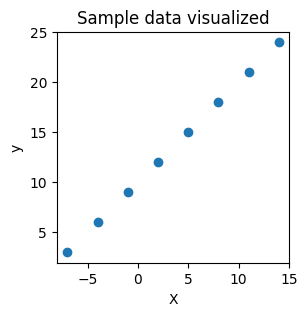

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualzie it
fig = plt.figure(figsize=(3,3))
plt.scatter(X,y)
plt.title('Sample data visualized')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Steps of modelling with TensorFlow


1. **Create a model** - define the input and output layers, and hidden layers
2. **Compiling a model** - define the loss function and the optimizer and evaluation metrics.
3. **Fitting a model** - try to find relationship between X and  y


In [ ]:
# Get data ready
X = tf.cast(tf.constant(X), dtype=tf.float32) # numpy has float64, we change it to 32
y = tf.cast(tf.constant(y), dtype=tf.float32) # because layers use 32 by default

# Set random seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# above I put layers into a list.
# An alternative is to use model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]) # mean abs error, stochastic gradient descent

# 3. Fit the model
# model.fit(X, y, epochs=5) before tf 2.7.0
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 608ms/step - loss: 18.9376 - mae: 18.9376
Epoch 2/5
1/1 [==============================] - 0s 13ms/step - loss: 18.6564 - mae: 18.6564
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 18.3751 - mae: 18.3751
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 18.0939 - mae: 18.0939
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 17.8126 - mae: 17.8126


1/1 [==============================] - 0s 77ms/step


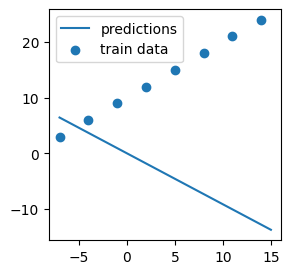

In [ ]:
# prediction using our model
x_test = np.arange(-7.0, 16.0, 1.0)
y_pred = model.predict(x_test)

fig = plt.figure(figsize=(3,3))
plt.plot(x_test, y_pred, label='predictions')
plt.scatter(X, y, label='train data')
plt.legend()

### Improving the model

We improve by altering the steps we took to create a model.

1. Creating a model — add more layers, increase the number of hidden units (neurons), change the activation function for each layer.
2. Compiling the model — change optimization function or learning rate of optimization function
3. Fitting model — more epochs or more date

In [ ]:
# We rebuild the model

# 1. Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 351ms/step - loss: 7.8291 - mae: 7.8291
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 7.6966 - mae: 7.6966
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 7.5641 - mae: 7.5641
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 7.4775 - mae: 7.4775
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 7.4719 - mae: 7.4719
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 7.4662 - mae: 7.4662
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 7.4606 - mae: 7.4606
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4550 - mae: 7.4550
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4494 - mae: 7.4494
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.4437 - mae: 7.4437
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - l

1/1 [==============================] - 0s 56ms/step


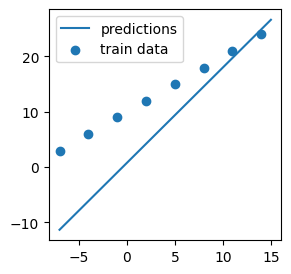

In [ ]:
# prediction using our model
x_test = np.arange(-7.0, 16.0, 1.0)
y_pred = model.predict(x_test)

fig = plt.figure(figsize=(3,3))
plt.plot(x_test, y_pred, label='predictions')
plt.scatter(X, y, label='train data')
plt.legend()

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14.1715 - mae: 14.1715
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 11.6816 - mae: 11.6816
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 10.3514 - mae: 10.3514
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 8.9804 - mae: 8.9804
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 7.3539 - mae: 7.3539
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 5.3923 - mae: 5.3923
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 3.8631 - mae: 3.8631
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 4.5474 - mae: 4.5474
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 5.1818 - mae: 5.1818
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 5.2882 - mae: 5.2882
Epoch 11/100
1/1 [==============================] - 0s 12ms/step 

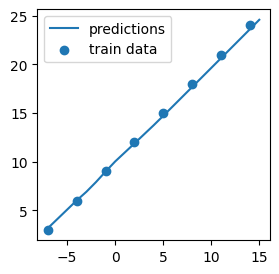

In [ ]:
# We rebuild the model

# 1. Create
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mae"])

# 3. Fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

# prediction using our model
x_test = np.arange(-7.0, 16.0, 1.0)
y_pred = model.predict(x_test)

fig = plt.figure(figsize=(3,3))
plt.plot(x_test, y_pred, label='predictions')
plt.scatter(X, y, label='train data')
plt.legend()

## Visualizing the model

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               200       
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 155ms/step
Weights: [[1.7231083]]
Biases: [0.8324995]


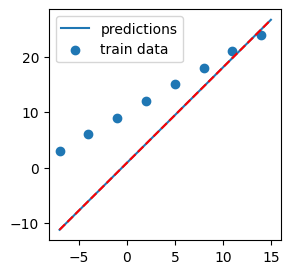

In [ ]:
# let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3.
model.summary()

# 3. Fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

# prediction using our model
x_test = np.arange(-7.0, 16.0, 1.0)
y_pred = model.predict(x_test)

fig = plt.figure(figsize=(3,3))
plt.plot(x_test, y_pred, label='predictions')
plt.scatter(X, y, label='train data')
plt.legend()


# Get the weights
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]
print("Weights:", weights)
print("Biases:", biases)

plt.plot(x_test, x_test*weights[0] + biases[0], 'r--', label='model')
plt.show()

# Full cycle to build and visualize model


In [ ]:
# Create data set
X = tf.range(-100, 100, 4)
y = X + 10

X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

# Split into test and train (basic for now)
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name='Regression_Model')

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Show Model Summary
model.summary()

Model: "Regression_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


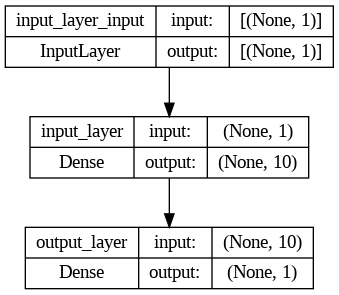

In [ ]:
# 3. Fit
model.fit(tf.expand_dims(X_test, axis=-1), y_test, epochs=100, verbose=0)

# Show SCHEME of a model
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

In [ ]:
# 4. predict
y_pred = tf.constant(model.predict(X_test))
y_pred

1/1 [==============================] - 0s 75ms/step


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[5.8296814],
       [6.189084 ],
       [6.5484867],
       [6.9078894],
       [7.267292 ],
       [7.626695 ],
       [7.986097 ],
       [8.3455   ],
       [8.704903 ],
       [9.064305 ]], dtype=float32)>

In [ ]:
# plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots test, train data, and predictions
  """
  fig = plt.figure(figsize=(5,3))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Test data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend()
  plt.show()

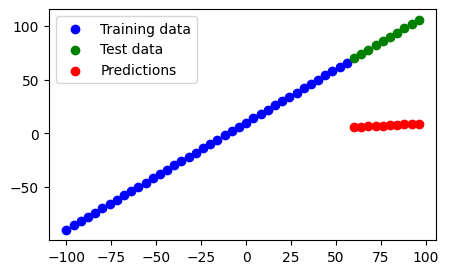

In [ ]:
plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred)

## Evaluate the model

In [ ]:
# evaluate the model
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 283ms/step - loss: 80.5530 - mae: 80.5530


[80.55301666259766, 80.55301666259766]

In [ ]:
# make sure that both tensors have the same shape
# y_test shape=(10,)
# y_pred shape=(10, 1)
# we are going to squeeze
# y_pred = tf.squeeze(y_pred)

In [ ]:
# calculate the mean absolute error
tf.metrics.MAE(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=80.55301>

In [ ]:
y_test, y_pred

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 70.,  74.,  78.,  82.,  86.,  90.,  94.,  98., 102., 106.],
       dtype=float32)>,
 <tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[5.8296814],
        [6.189084 ],
        [6.5484867],
        [6.9078894],
        [7.267292 ],
        [7.626695 ],
        [7.986097 ],
        [8.3455   ],
        [8.704903 ],
        [9.064305 ]], dtype=float32)>)

### Save model

In [ ]:
model.save("01_SimpleRegression")

In [ ]:
model.save("01_SimpleRegression.h5")

### Load model

In [ ]:
loaded_model = tf.keras.models.load_model("/content/01_SimpleRegression")
loaded_model.summary()

Model: "Regression_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_pred_loaded = tf.constant(loaded_model.predict(X_test))
y_pred_loaded == y_pred

1/1 [==============================] - 1s 541ms/step


<tf.Tensor: shape=(10, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

In [ ]:
loaded_model_h5 = tf.keras.models.load_model("/content/01_SimpleRegression.h5")
loaded_model_h5.summary()
y_pred_loaded_h5 = tf.constant(loaded_model_h5.predict(X_test))
y_pred_loaded_h5 == y_pred

Model: "Regression_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 115ms/step


<tf.Tensor: shape=(10, 1), dtype=bool, numpy=
array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])>

## Download the model from Google Colab

In [ ]:
from google.colab import files
files.download("/content/01_SimpleRegression.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Mount Google drive first
!cp /content/01_SimpleRegression.h5 /content/ttt